In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo Excel
data = pd.ExcelFile("OCyT_Data.xlsx")

# Ver nombres de todas las hojas
print(data.sheet_names)



['Grafica 1', 'Grafica 2', 'Grafica 3', 'Grafico 4', 'Grafica 5', 'Grafica 6', 'Grafica 7', 'Grafica 8', 'Grafica 9', 'Grafica 10', 'Grafica 11', '%PIB ACTI']


In [38]:
#diccionario para las hojas

sheets = {sheet: pd.read_excel(data, sheet_name=sheet) for sheet in data.sheet_names}

print("Hojas disponibles:", sheets.keys())

df = sheets[list(sheets.keys())[11]]   # Escoger una hoja como ejemplo
df.head()

Hojas disponibles: dict_keys(['Grafica 1', 'Grafica 2', 'Grafica 3', 'Grafico 4', 'Grafica 5', 'Grafica 6', 'Grafica 7', 'Grafica 8', 'Grafica 9', 'Grafica 10', 'Grafica 11', '%PIB ACTI'])


,"Inversión en actividades de ciencia, tecnología e innovación –ACTI como porcentaje del PIB",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,2019,2020.000000,2021*,2022+,2023+,NaN,NaN,NaN
1,I+D como % PIB,0.002529,0.002962,0.002818,0.002297,0.003112,NaN,NaN,NaN
2,ACTI como % PIB,0.008084,0.009577,0.011484,0.009888,0.010346,NaN,NaN,-0.184762
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.139025
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
#Exploracióninicial

print("Dimensiones:", df.shape)
print("\nTipos de datos:")
print(df.info())

print("\nValores faltantes:")
print(df.isna().sum())

Dimensiones: (33, 9)

Tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 9 columns):
 #   Column                                                                                      Non-Null Count  Dtype  
---  ------                                                                                      --------------  -----  
 0   Inversión en actividades de ciencia, tecnología e innovación –ACTI como porcentaje del PIB  5 non-null      object 
 1   Unnamed: 1                                                                                  7 non-null      object 
 2   Unnamed: 2                                                                                  3 non-null      float64
 3   Unnamed: 3                                                                                  3 non-null      object 
 4   Unnamed: 4                                                                                  3 non-null      object 
 5   Unnamed:

In [40]:
# 4. Limpieza de datos

df = df.drop_duplicates()
df = df.fillna(0)

Inversión en actividades de ciencia, tecnología e innovación –ACTI como porcentaje del PIB     object
Unnamed: 1                                                                                     object
Unnamed: 2                                                                                    float64
Unnamed: 3                                                                                     object
Unnamed: 4                                                                                     object
Unnamed: 5                                                                                     object
Unnamed: 6                                                                                    float64
Unnamed: 7                                                                                    float64
Unnamed: 8                                                                                    float64
dtype: object

Estadísticos descriptivos:
        Unnamed: 2  Unnamed: 6  Unnamed:

/tmp/ipykernel_39777/3893465390.py:6: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


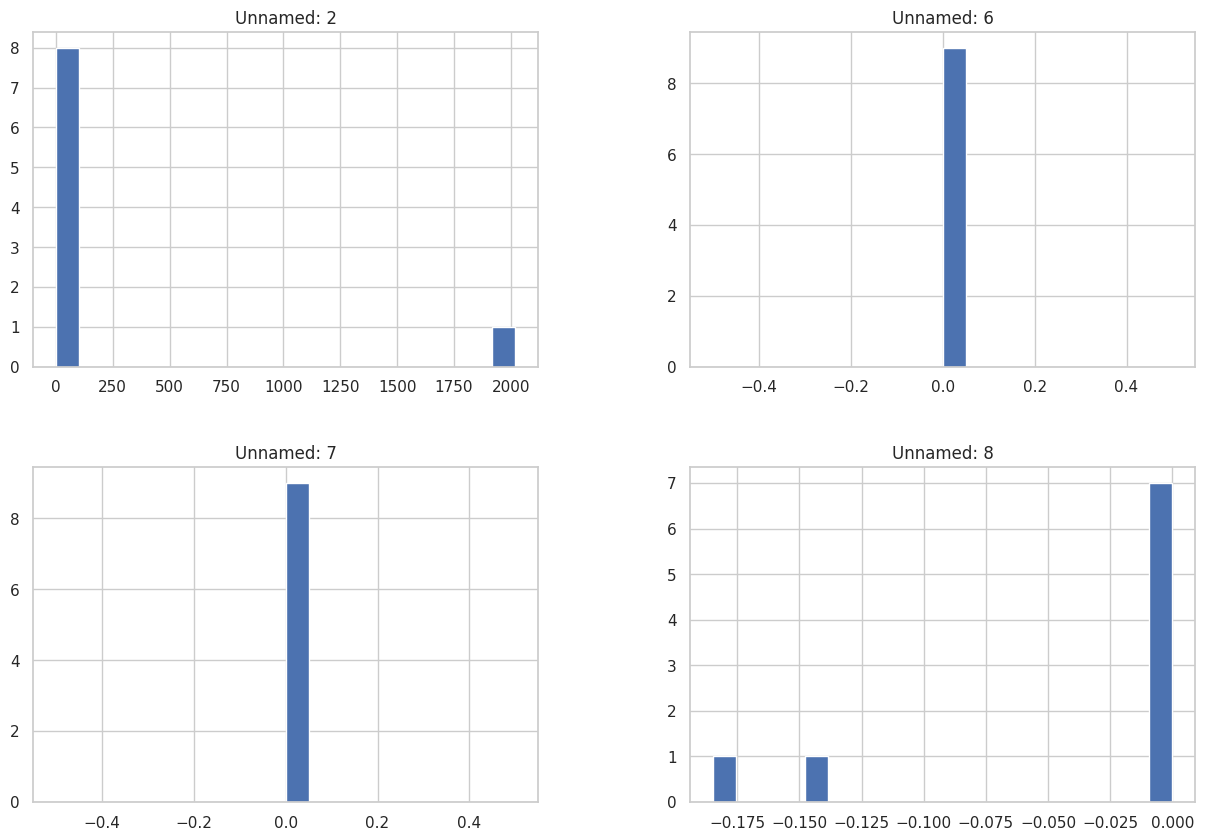

In [41]:
# 5. Análisis descriptivo

# Forzar a que todas las columnas posibles se conviertan en numéricas
# (las que no puedan se quedarán como NaN)
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors="ignore")

# Revisar de nuevo tipos de datos
print(df.dtypes)

# Ahora sí, estadísticos y gráficas
print("\nEstadísticos descriptivos:")
print(df.describe())

# Solo columnas numéricas
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

if len(num_cols) > 0:
    df[num_cols].hist(bins=20, figsize=(15,10))
    plt.show()
else:
    print("⚠️ No hay columnas numéricas para graficar.")

